In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\\Users\\D\\Desktop\\spam.csv', encoding='latin1')


In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3663,ham,Huh? 6 also cannot? Then only how many mistakes?,NaN,NaN,NaN
860,ham,In work now. Going have in few min.,NaN,NaN,NaN
4288,ham,"Okay, good, no problem, and thanx!",NaN,NaN,NaN
756,ham,Cant think of anyone with * spare room off * t...,NaN,NaN,NaN
2239,ham,Every day i use to sleep after &lt;#&gt; so ...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
2145,spam,Sunshine Hols. To claim ur med holiday send a ...
4983,spam,goldviking (29/M) is inviting you to be his fr...
2105,ham,I fetch yun or u fetch?
2578,ham,Erm. I thought the contract ran out the4th of ...
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [10]:
df['target'] = encoder.fit_transform(df['target'])


In [11]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()


403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()


0

In [16]:
df.shape


(5169, 2)

# EDA

In [17]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

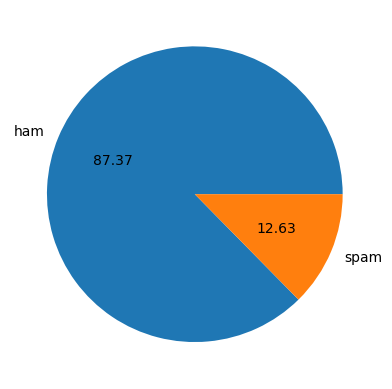

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [19]:
# data is imbalance

In [20]:
import nltk
# to check how much sms, alphabet are using

In [21]:
#nltk.download('punkt')


In [22]:
df['num_characters'] = df['text'].apply(len)


In [23]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

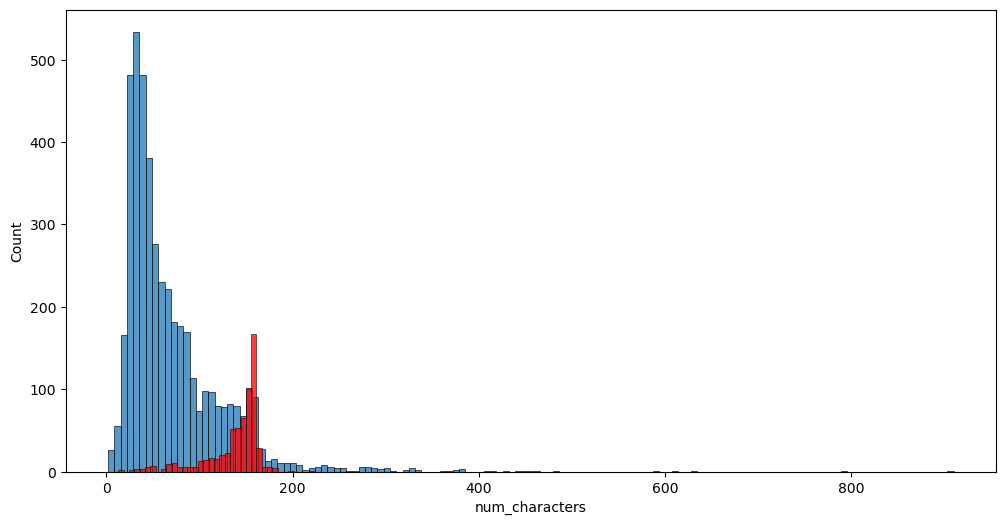

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

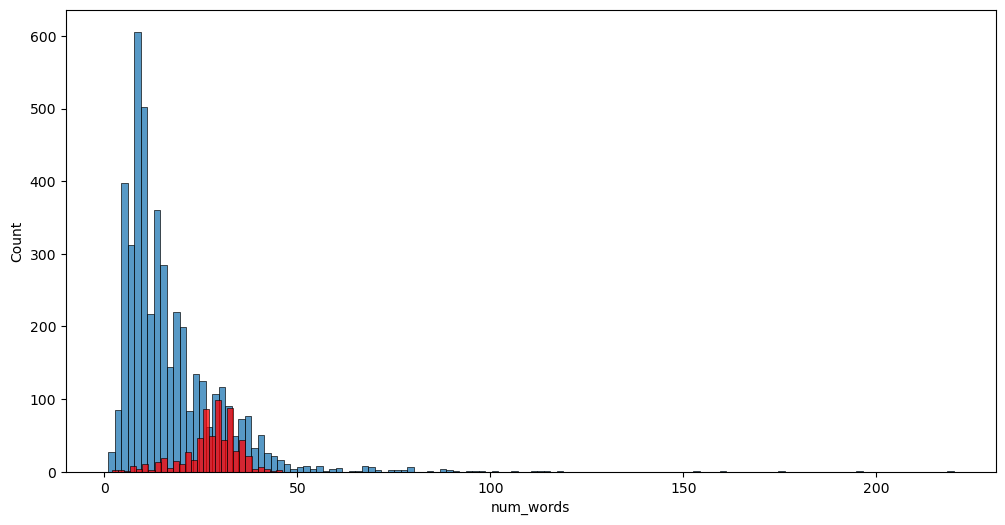

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


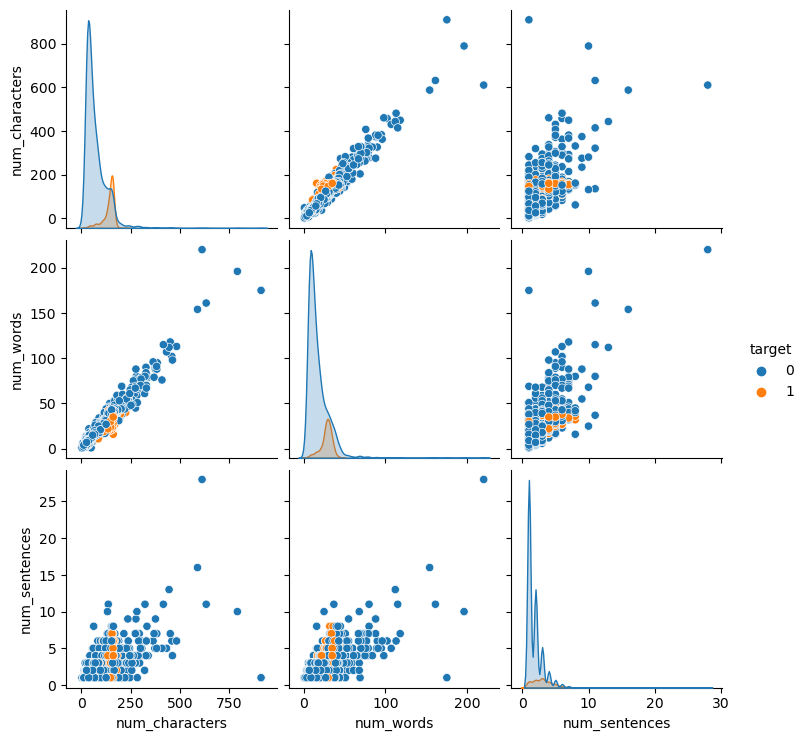

In [33]:
sns.pairplot(df,hue='target')


<AxesSubplot:>

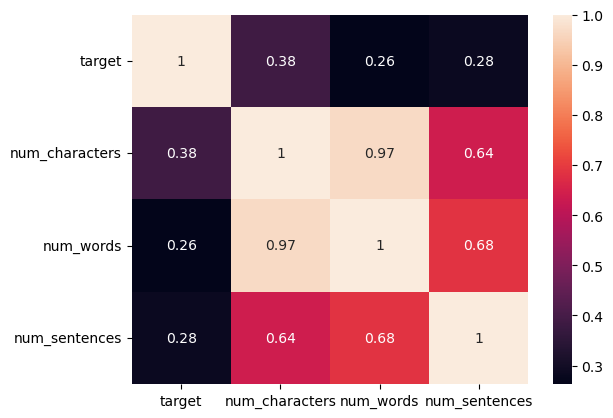

In [34]:
sns.heatmap(df.corr(),annot=True)


# 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming
word cloud which word is uses most
finding top words

In [35]:
import string
from nltk.corpus import stopwords
import nltk



In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]   # copying a list
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]   # copying a list
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
#pip install wordcloud


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


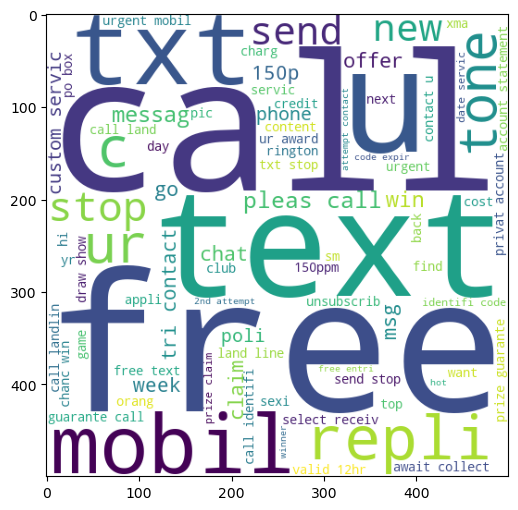

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


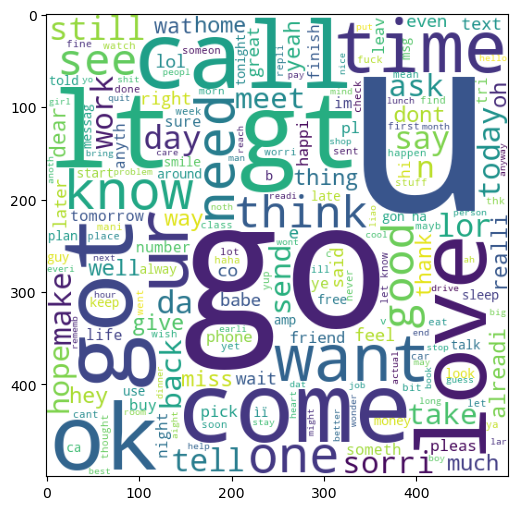

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [45]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


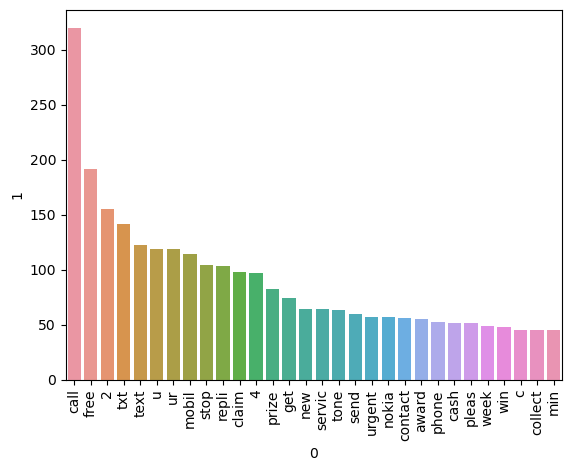

In [46]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [47]:
ham_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
        


In [48]:
len(ham_corpus)


9939

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


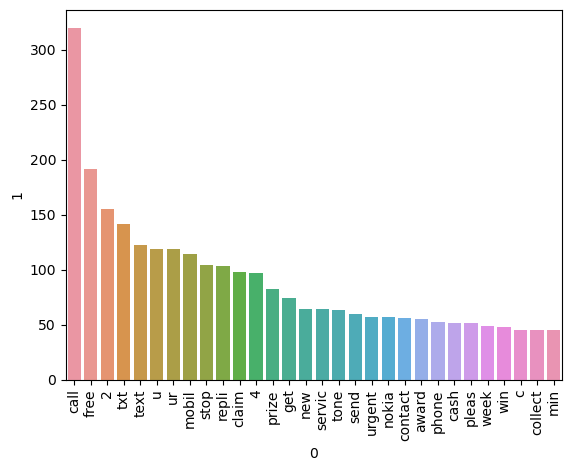

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# model building

In [106]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['transformed_text'])

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [108]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [109]:
# Function to classify emails
def classify_email():
    # Dynamically take input from the user
    email_text = input("Enter the email text: ")
    
    # Transform the email text using the same vectorizer
    email_vector = vectorizer.transform([email_text])
    
    # Predict the label (0 or 1)
    prediction = model.predict(email_vector)
    
    # Return the prediction
    result = "Spam" if prediction[0] == 1 else "Not Spam"
    return f"The email is classified as: {result}"

In [112]:
result = classify_email()
print(result)


Enter the email text: chance
The email is classified as: Not Spam
